In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
df = pd.read_csv('insurance.csv')

In [156]:
education_map = {
    'JD': 5, 'PhD': 4, 'Masters': 3,
    'College': 2, 'High School': 1, 'MD': 5
}
df['insured_education_level'] = df['insured_education_level'].map(education_map)


In [159]:
y=df['fraud_reported']
y = le.fit_transform(y)

In [160]:
numeric_columns = [
    'months_as_customer',
    'age',
    'policy_deductable',
    'policy_annual_premium',
    'umbrella_limit',
    'capital-gains',
    'capital-loss',
    'incident_hour_of_the_day',
    'number_of_vehicles_involved',
    'bodily_injuries',
    'witnesses',
    'total_claim_amount',
    'injury_claim',
    'property_claim',
    'vehicle_claim',
    'auto_year',
]


df_numeric = df[numeric_columns]

In [113]:
df_numeric

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,cluster
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007,2
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1
5,256,39,1000,1351.10,0,0,0,19,3,0,2,64100,6410,6410,51280,2003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,1000,1235.14,0,0,-32100,20,3,0,1,60200,6020,6020,48160,2012,0
994,141,30,1000,1347.04,0,0,-82100,6,1,1,2,6480,540,1080,4860,1996,2
995,3,38,1000,1310.80,0,0,0,20,1,0,1,87200,17440,8720,61040,2006,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,3,108480,18080,18080,72320,2015,1


In [161]:
df_numeric['fraud_reported'] = y

C:\Users\hebal\AppData\Local\Temp\ipykernel_12600\2294971535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['fraud_reported'] = y


In [86]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

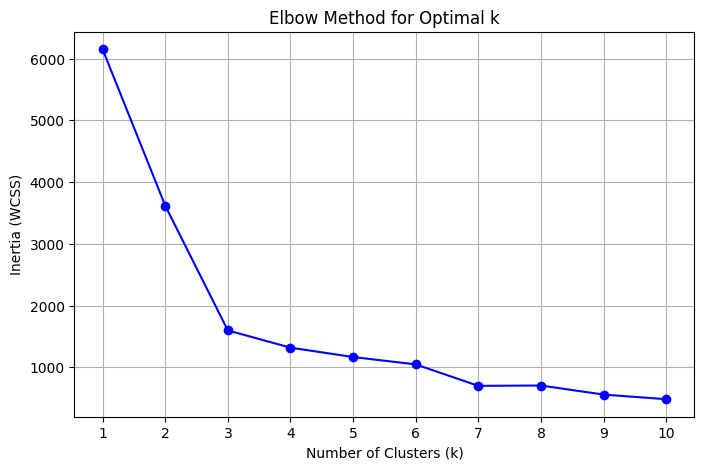

C:\Users\hebal\AppData\Local\Temp\ipykernel_12600\3517842601.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['cluster'] = clusters



Fraud Rate per Cluster:
cluster
0    0.301449
1    0.086957
2    0.279018
Name: fraud_reported, dtype: float64


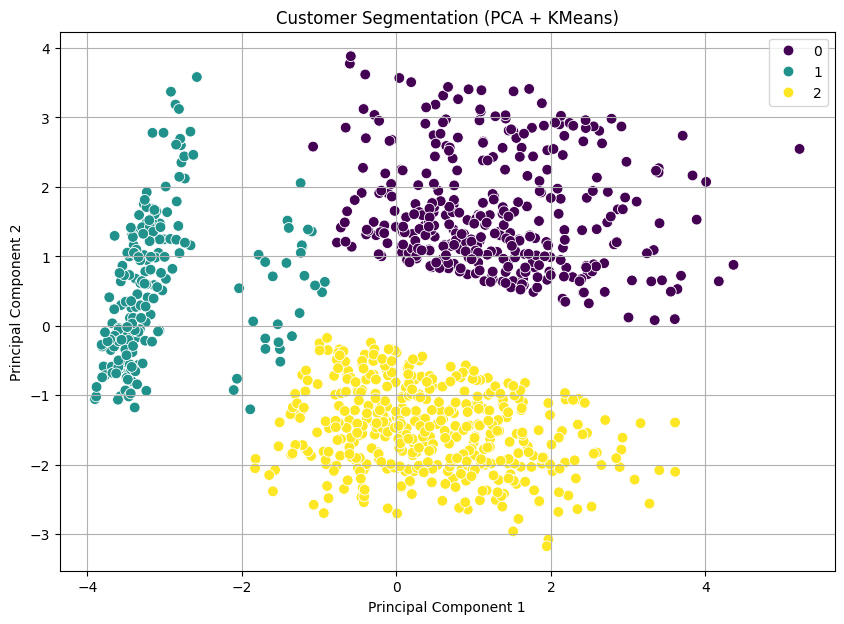

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df_numeric['cluster'] = clusters
fraud_by_cluster = df_numeric.groupby('cluster')['fraud_reported'].mean()

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=60)
plt.title('Customer Segmentation (PCA + KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

fraud_by_cluster = df_numeric.groupby('cluster')['fraud_reported'].mean()
print("\nFraud Rate per Cluster:")
print(fraud_by_cluster)


In [ ]:
loading_df = pd.DataFrame(pca.components_, columns=df_numeric.columns, index=['PC1', 'PC2'])

print("Feature loadings (weights) for each principal component:")
print(loading_df.T.sort_values(by='PC1', ascending=False))  


Feature loadings (weights) for each principal component:
                                  PC1       PC2
total_claim_amount           0.409794  0.074368
vehicle_claim                0.399615  0.062469
property_claim               0.337010  0.073314
injury_claim                 0.335535  0.087008
collision_type               0.314284 -0.045931
number_of_vehicles_involved  0.215605 -0.012348
incident_hour_of_the_day     0.119433  0.093393
fraud_reported               0.093442  0.029862
capital-gains                0.036734 -0.025586
policy_deductable            0.013452  0.037906
insured_education_level      0.011897  0.038360
policy_state                 0.009549 -0.012313
insured_hobbies              0.007890 -0.118262
age                          0.007554  0.633464
bodily_injuries              0.006451  0.018648
months_as_customer           0.003789  0.630805
insured_occupation           0.002363  0.020192
witnesses                   -0.005027  0.114520
auto_year                   -0.

In [166]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.551


In [100]:
print(f'Inertia (Sum of squared distances): {kmeans.inertia_}')


Inertia (Sum of squared distances): 1397.4230747104561


In [167]:
df_numeric.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'cluster'],
      dtype='object')

In [102]:
import joblib

In [176]:
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# === 1. Define numeric columns and prepare df_numeric ===
numeric_columns = [
    'months_as_customer',
    'age',
    'policy_deductable',
    'policy_annual_premium',
    'umbrella_limit',
    'capital-gains',
    'capital-loss',
    'incident_hour_of_the_day',
    'number_of_vehicles_involved',
    'bodily_injuries',
    'witnesses',
    'total_claim_amount',
    'injury_claim',
    'property_claim',
    'vehicle_claim',
    'auto_year',
]

df_numeric = df[numeric_columns].copy()
df_numeric['fraud_reported'] = y  

# === 2. Preprocess and fit PCA + KMeans ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric[numeric_columns])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df_numeric['cluster'] = clusters

# Calculate fraud rate per cluster
fraud_by_cluster = df_numeric.groupby('cluster')['fraud_reported'].mean()




Predicted Cluster: 0
Estimated Fraud Probability: 29.31%


In [ ]:
# === 3. Prediction function ===
def predict_cluster_with_fraud_chance(new_data_dict):
    """
    Predicts cluster and fraud chance based on input features.
    """
    # Convert input to DataFrame
    new_df = pd.DataFrame([new_data_dict])
    new_df = new_df[numeric_columns]

    # Scale and apply PCA
    new_scaled = scaler.transform(new_df)
    new_pca = pca.transform(new_scaled)

    # Predict cluster
    predicted_cluster = kmeans.predict(new_pca)[0]

    # Get fraud probability for that cluster
    fraud_chance = fraud_by_cluster[predicted_cluster]

    return predicted_cluster, round(fraud_chance * 100, 2)

In [174]:
# === 4. Example input ===
example_input = {
    'months_as_customer': 400,
    'age': 45,
    'policy_deductable': 1000,
    'policy_annual_premium': 850.50,
    'umbrella_limit': 0,
    'capital-gains': 0,
    'capital-loss': 0,
    'incident_hour_of_the_day': 14,
    'number_of_vehicles_involved': 2,
    'bodily_injuries': 1,
    'witnesses': 2,
    'total_claim_amount': 12000.0,
    'injury_claim': 20000.0,
    'property_claim': 3000.0,
    'vehicle_claim': 7000.0,
    'auto_year': 2015,
}

pred_cluster, fraud_prob = predict_cluster_with_fraud_chance(example_input)
print(f"Predicted Cluster: {pred_cluster}")
print(f"Estimated Fraud Probability: {fraud_prob}%")


Predicted Cluster: 0
Estimated Fraud Probability: 29.31%


In [177]:
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

In [178]:
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']